In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv("C:\\Users\\vinayak tyagi\\Downloads\\Churn_Modelling.csv")
# df.drop("RowNumber", axis=1, inplace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df.corr(),annot=True)

In [4]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 13].values
print(X,"\n")
print(y)

# a  = pd.get_dummies(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]] 

[1 0 1 ... 1 1 0]


In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

print(X)

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train); print(X_test)

[[-0.5698444   1.74309049  0.16958176 ...  0.64259497 -1.03227043
   1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945 ...  0.64259497  0.9687384
  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [-0.5698444  -0.57369368  0.9015152  ...  0.64259497 -1.03227043
   1.41231994]
 [-0.5698444   1.74309049 -0.62420521 ...  0.64259497  0.9687384
   0.84432121]
 [ 1.75486502 -0.57369368 -0.28401079 ...  0.64259497 -1.03227043
   0.32472465]]
[[ 1.75486502 -0.57369368 -0.55204276 ...  0.64259497  0.9687384
   1.61085707]
 [-0.5698444  -0.57369368 -1.31490297 ...  0.64259497 -1.03227043
   0.49587037]
 [-0.5698444   1.74309049  0.57162971 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-0.5698444   1.74309049 -0.74791227 ...  0.64259497 -1.03227043
   0.71888467]
 [ 1.75486502 -0.57369368 -0.00566991 ...  0.64259497  0.9687384
  -1.54507805]
 [ 1.75486502 -0.57369368 -0.79945688 ...  0.64259497 -1.03227043
   1.61255917]]


In [7]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  """
c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  
c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [8]:
# Fitting the ANN to the Training set
print(X_train); print(y_train)
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

[[-0.5698444   1.74309049  0.16958176 ...  0.64259497 -1.03227043
   1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945 ...  0.64259497  0.9687384
  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [-0.5698444  -0.57369368  0.9015152  ...  0.64259497 -1.03227043
   1.41231994]
 [-0.5698444   1.74309049 -0.62420521 ...  0.64259497  0.9687384
   0.84432121]
 [ 1.75486502 -0.57369368 -0.28401079 ...  0.64259497 -1.03227043
   0.32472465]]
[0 0 0 ... 0 0 1]


c:\users\vinayak tyagi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
8000/8000 [==============================] - 2s 212us/step - loss: 0.4861 - acc: 0.7961
Epoch 2/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.4274 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 147us/step - loss: 0.4213 - acc: 0.7969
Epoch 4/100
8000/8000 [==============================] - 1s 150us/step - loss: 0.4176 - acc: 0.8230
Epoch 5/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4158 - acc: 0.8267
Epoch 6/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.4143 - acc: 0.8287
Epoch 7/100
8000/8000 [==============================] - 1s 149us/step - loss: 0.4127 - acc: 0.8305
Epoch 8/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.4116 - acc: 0.8320
Epoch 9/100
8000/8000 [==============================] - 1s 143us/step - loss: 0.4106 - acc: 0.8324
Epoch 10/100
8000/8000 [==============================] - 1s 139us/step - loss: 0.4097 - acc: 0.8321

In [9]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
[[1546   49]
 [ 268  137]]


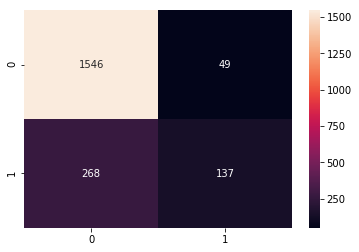

In [10]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.5g')